# Impact of BTS music on mental health
### Active Engagement
To explore the impact of BTS music on mental health, I began by identifying key areas of focus:
  
- Defined purpose: Assess BTS music’s impact on fans' mental health.  
- Key questions: How does BTS music affect mood? Are there correlations with mental health ratings?  
- Planned two datasets: survey data and Spotify/lyrics data.  

I then defined two datasets for analysis: 
- Designed form to collect data on demographics, listening habits, mental health metrics, and qualitative feedback.  
- Tested the form with peers and refined questions for clarity.  

I designed a Google Form to collect detailed and diverse responses from BTS fans.
- [Google Form Link](https://docs.google.com/forms/d/e/1FAIpQLSdJJ_qkvIGL6EMnlaQrQvmnOLnZB0qCprr8yWjSUuybtRgK7w/viewform?usp=sf_link)  
- Distributed the form via BTS fan forums and social media. 
- Gathered Spotify metadata and lyrics for analysis.  

Throughout the project, I actively sought feedback:
- **Peers**: Reviewed survey design and analysis ideas.  
- **Mentors**: Advised on KDD process and mental health frameworks.  

Feedback improved survey design, added fandom-related questions, and guided integration of Spotify data, enriching the analysis.

## **Libraries and Datasets**

In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url_survey = "https://docs.google.com/spreadsheets/d/1Ty7bv3jTIjPaMM7WbYpWzFUGOBewLFA-odJlg6xh4KM/export?format=csv"

print("Libraries are installed and working!")

Libraries are installed and working!


## **Display Survey and Spotify datasets** 

In [371]:
survey_data = pd.read_csv(url_survey, encoding='utf-8')

survey_data.head()

,Отметка времени,What is your age?,What is your gender?,What country are you from?,How often do you listen to BTS music?,How many hours per day do you listen to music?,What is your primary music streaming service?,What is your favorite BTS song?,"On a scale of 0-10, how would you rate your current level of anxiety?","On a scale of 0-10, how would you rate your current level of depression?",...,How often do you feel sad?,How does listening to BTS music affect your mood?,Do you use BTS music as a coping mechanism for stress or anxiety?,Do you believe that BTS music has improved your mental health?,"If yes, please explain how (optional)",What themes in BTS's music resonate with you the most?,Are you a part of BTS fandom (ARMY)?,How has being part of the BTS fandom (ARMY) impacted your mental health?,Do you discuss BTS music and its impact on mental health with others?,Is there anything else you would like to share about your experience with BTS music and its impact on your mental health?
0,11.11.2024 16:30:01,19,Female,Ukraine,4.0,5,Spotify,Not Today,6,2,...,2,5,Yes,Yes,It gives me more confidence and I do not feel ...,Cool,Yes,ARMY is very strong fandom. They will anything...,Yes,BTS forever💜
1,11.11.2024 17:56:08,16,Female,India,5.0,3,"Spotify, YouTube Music",Boy with luv,8,8,...,4,5,Yes,I don't know,NaN,Lively themes,Yes,It helped me gain confidence and stay happy,Yes,No
2,12.11.2024 3:57:24,19,Female,India,5.0,3,"Spotify, YouTube Music",Zero o clock,3,0,...,1,5,Yes,Yes,"When COVID hit, I was already in deep depressi...","Love yourself for truly who u are, face yourse...",Yes,Very much in a positive way.like whenever I fe...,Yes,I have already shared everything..I think youn...
3,12.11.2024 16:48:51,15,Female,"Maryland United state of America, and fuzhou c...",5.0,5,Spotify,"No more dreams, Spring days, and permission to...",1,2,...,1,5,I don't know,I don't know,I said idk because I listened to bts since 4th...,Idk,Yes,Idk,No,I love bts and they make me happy
4,13.11.2024 0:39:52,17,Male,North America,5.0,5,Spotify,I Need U,4,2,...,1,5,No,Yes,Well.... a lot of their music ive been able to...,"everything, from their music about love to the...",Yes,"honestly, a good amount",No,"no, thats all"


In [372]:
spotify_data = pd.read_csv("original/bts_spotify_data.csv", encoding='utf-16le')
spotify_data.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,raw_track_title,eng_track_title,lyrics,hidden_track,...,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature,eng_lyrics_source_url,eng_lyrics_credits
0,BTS-1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we're now going to progress to some steps\nwhi...,False,...,1.0,0.245,0.1790,0.266000,0.179,0.532,94.871,4.0,NaN,NaN
1,BTS-2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,...,0.0,0.160,0.0104,0.000006,0.134,0.868,144.020,4.0,NaN,NaN
2,BTS-3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,...,1.0,0.802,0.9120,0.000000,0.913,0.817,121.045,3.0,NaN,NaN
3,BTS-4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what's your dre...",False,...,1.0,0.470,0.0118,0.000002,0.431,0.594,167.898,4.0,NaN,NaN
4,BTS-5,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,...,0.0,0.319,0.4940,0.762000,0.392,0.854,125.897,4.0,NaN,NaN


## **Data Cleaning**

- Standardize formats (e.g., age as numeric, text fields as lowercase).
    - Formating cvs files(remove, remane columns).
    - Convert all text to lowercase.
    - Strip leading/trailing whitespace from text.
    - Create new cvs file with updated data.
- Handle missing values.
    - Count how many missing values.
    - Replace them with "no data"

**Formating <u>bts_survey_data.cvs</u> file**
1. Remove first column with time when survey was taken.
2. Rename columns with appopriate names

*Remove first column*

In [373]:
survey_data_updated = survey_data.iloc[:, 1:] 

*Remane columns*

In [374]:
new_column_names = {
    "What is your age?": "Age",
    "What is your gender?": "Gender",
    "What country are you from?": "Country",
    "How often do you listen to BTS music?": "BTS_Listening_Freq",
    "How many hours per day do you listen to music?": "Daily_Music_Hours",
    "What is your primary music streaming service?":"Streaming_Service",
    "What is your favorite BTS song?":"Favorite_Song",
    "On a scale of 0-10, how would you rate your current level of anxiety?":"Anxiety_Level",
    "On a scale of 0-10, how would you rate your current level of depression? ": "Depression_Level",
    "On a scale of 0-10, how would you rate your current level of stress?":"Stress_Level",
    "How often do you feel lonely?":"Loneliness_Rating",
    "How often do you feel sad?":"Sadness_Rating",
    "How does listening to BTS music affect your mood?":"BTS_Mood_Impact",
    "Do you use BTS music as a coping mechanism for stress or anxiety?":"BTS_Stress_Management",
    "Do you believe that BTS music has improved your mental health?":"BTS_Mental_Health_Impact",
    "If yes, please explain how (optional)":"BTS_Impact_Explanation",
    "What themes in BTS's music resonate with you the most?":"Themes",
    "Are you a part of BTS fandom (ARMY)?":"ARMY_Membership",
    "How has being part of the BTS fandom (ARMY) impacted your mental health?":"ARMY_Fandom_MH_Impact",
    "Do you discuss BTS music and its impact on mental health with others?":"Health_Talk_with_Friends",
    "Is there anything else you would like to share about your experience with BTS music and its impact on your mental health?":"Additional_BTS_Impact"
}
survey_data_updated.rename(columns=new_column_names, inplace=True)

In [375]:
print(survey_data_updated.columns)

Index(['Age', 'Gender', 'Country', 'BTS_Listening_Freq', 'Daily_Music_Hours',
       'Streaming_Service', 'Favorite_Song', 'Anxiety_Level',
       'Depression_Level', 'Stress_Level', 'Loneliness_Rating',
       'Sadness_Rating', 'BTS_Mood_Impact', 'BTS_Stress_Management',
       'BTS_Mental_Health_Impact', 'BTS_Impact_Explanation', 'Themes',
       'ARMY_Membership', 'ARMY_Fandom_MH_Impact', 'Health_Talk_with_Friends',
       'Additional_BTS_Impact'],
      dtype='object')


*Convert all text to lowercase*

In [376]:
# Columns to normalize to lowercase
columns_to_lower = [
    'Gender', 'Country', 'Streaming_Service', 'Favorite_Song', 'BTS_Impact_Explanation', 
    'Themes', 'ARMY_Fandom_MH_Impact', 'Additional_BTS_Impact', 'BTS_Stress_Management', 
    'BTS_Mental_Health_Impact', 'ARMY_Membership', 'Health_Talk_with_Friends'
]

# Apply lowercasing to the selected columns
survey_data_updated[columns_to_lower] = survey_data_updated[columns_to_lower].apply(lambda col: col.str.lower())

# Special processing for 'Country' column
survey_data_updated['Country'] = survey_data_updated['Country'].str.strip().replace(
    {
        'us': 'united states',
        'usa': 'united states',
        'u.s.a': 'united states',
        'u.s.a.': 'united states',
        'U.S.A': 'united states',
        'united states of america': 'united states',
        'united states': 'united states',
        'no data': 'no data',
        'north korea':'south korea',
        'korea':'south korea',
        'uk':'united kingdom',
        'united states/austria':'austria',
        'maryland united state of america, and fuzhou china':'china',
        'unknown': 'no data'
    }
).str.lower()


In [405]:
survey_data_updated['Age'] = pd.to_numeric(survey_data_updated['Age'], errors='coerce')
survey_data_updated['Age'] = survey_data_updated['Age'].fillna(0).astype(int)

In [378]:
print(survey_data_updated.head())

   Age  Gender        Country  BTS_Listening_Freq  Daily_Music_Hours  \
0   19  female        ukraine                 4.0                  5   
1   16  female          india                 5.0                  3   
2   19  female          india                 5.0                  3   
3   15  female          china                 5.0                  5   
4   17    male  north america                 5.0                  5   

        Streaming_Service                                      Favorite_Song  \
0                 spotify                                          not today   
1  spotify, youtube music                                       boy with luv   
2  spotify, youtube music                                      zero o clock    
3                 spotify  no more dreams, spring days, and permission to...   
4                 spotify                                           i need u   

   Anxiety_Level  Depression_Level  Stress_Level  ...  Sadness_Rating  \
0            

*Remove extra spaces at the beginning and end*

In [379]:
survey_data_updated = survey_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_653/197381687.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  survey_data_updated = survey_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)


*Count missing values for each column*

In [380]:
print(survey_data_updated.isna().sum())

Age                          0
Gender                       0
Country                      3
BTS_Listening_Freq           1
Daily_Music_Hours            0
Streaming_Service            0
Favorite_Song                1
Anxiety_Level                0
Depression_Level             0
Stress_Level                 0
Loneliness_Rating            0
Sadness_Rating               0
BTS_Mood_Impact              0
BTS_Stress_Management        2
BTS_Mental_Health_Impact     0
BTS_Impact_Explanation      28
Themes                       9
ARMY_Membership              0
ARMY_Fandom_MH_Impact       16
Health_Talk_with_Friends     0
Additional_BTS_Impact       34
dtype: int64


*Replace missing values with "no data"*

In [381]:
survey_data_updated = survey_data_updated.astype(str)

survey_data_updated.replace(["nan"], "no data", inplace=True)


In [382]:
print(survey_data_updated.isna().sum())

Age                         0
Gender                      0
Country                     0
BTS_Listening_Freq          0
Daily_Music_Hours           0
Streaming_Service           0
Favorite_Song               0
Anxiety_Level               0
Depression_Level            0
Stress_Level                0
Loneliness_Rating           0
Sadness_Rating              0
BTS_Mood_Impact             0
BTS_Stress_Management       0
BTS_Mental_Health_Impact    0
BTS_Impact_Explanation      0
Themes                      0
ARMY_Membership             0
ARMY_Fandom_MH_Impact       0
Health_Talk_with_Friends    0
Additional_BTS_Impact       0
dtype: int64


*Check the result for replace empty strings*

In [383]:
print(survey_data_updated.iloc[17])

Age                                             22
Gender                                      female
Country                                    no data
BTS_Listening_Freq                             5.0
Daily_Music_Hours                                4
Streaming_Service           spotify, youtube music
Favorite_Song                         crystal snow
Anxiety_Level                                    6
Depression_Level                                 2
Stress_Level                                     3
Loneliness_Rating                                3
Sadness_Rating                                   4
BTS_Mood_Impact                                  5
BTS_Stress_Management                          yes
BTS_Mental_Health_Impact                       yes
BTS_Impact_Explanation                     no data
Themes                                     no data
ARMY_Membership                                yes
ARMY_Fandom_MH_Impact                      no data
Health_Talk_with_Friends       

*Create a new filtered cvs file*

In [384]:
survey_data_updated.to_csv("survey_data.csv")

**Formating <u>bts_spotify_data.cvs</u> file**
1. Remove unnecessary columns
2. Handle missing values

*Print and remove columns that need to be removed as it does not has important information for the project.*

In [385]:
columns_to_remove = [6, 9, 10, 11, 13, 15, 16, 32, 33]

columns_to_remove_names = spotify_data.columns[columns_to_remove]
print("Columns to be removed:")
print(columns_to_remove_names)

Columns to be removed:
Index(['raw_track_title', 'hidden_track', 'remix', 'featured', 'repackaged',
       'has_full_ver', 'is_alt_lang_ver', 'eng_lyrics_source_url',
       'eng_lyrics_credits'],
      dtype='object')


In [386]:
spotify_data_updated = spotify_data.drop(columns_to_remove_names, axis=1)

*Format all text to lowercase*

In [387]:
spotify_data_updated['album_title'] = spotify_data_updated['album_title'].str.lower()
spotify_data_updated['eng_album_title'] = spotify_data_updated['eng_album_title'].str.lower()
spotify_data_updated['eng_track_title'] = spotify_data_updated['eng_track_title'].str.lower()
spotify_data_updated['lyrics'] = spotify_data_updated['lyrics'].str.lower()

*Remove spaces at the beggining and end*

In [388]:
spotify_data_updated = spotify_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipykernel_653/1879410504.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  spotify_data_updated = spotify_data_updated.applymap(lambda x: x.strip() if isinstance(x, str) else x)


*Count missing/empty values in the dataset*

In [389]:
print(spotify_data_updated.isna().sum())

id                                 0
album_title                        0
eng_album_title                    0
album_rd                           0
album_seq                          0
track_title                        0
eng_track_title                    0
lyrics                            31
performed_by                      23
lang                              22
spotify_album_id                  23
spotify_track_duration_ms         23
spotify_track_id                  23
spotify_track_danceability        23
spotify_track_energy              23
spotify_track_key                 23
spotify_track_loudness            23
spotify_track_mode                23
spotify_track_speechiness         23
spotify_track_acousticness        23
spotify_track_instrumentalness    23
spotify_track_liveness            23
spotify_track_valence             23
spotify_track_tempo               23
spotify_track_time_signature      23
dtype: int64


*Replace missing values with "no data"*

In [390]:
spotify_data_updated = spotify_data_updated.astype(str)

spotify_data_updated.replace(["nan"], "no data", inplace=True)

In [391]:
print(spotify_data_updated.isna().sum())

id                                0
album_title                       0
eng_album_title                   0
album_rd                          0
album_seq                         0
track_title                       0
eng_track_title                   0
lyrics                            0
performed_by                      0
lang                              0
spotify_album_id                  0
spotify_track_duration_ms         0
spotify_track_id                  0
spotify_track_danceability        0
spotify_track_energy              0
spotify_track_key                 0
spotify_track_loudness            0
spotify_track_mode                0
spotify_track_speechiness         0
spotify_track_acousticness        0
spotify_track_instrumentalness    0
spotify_track_liveness            0
spotify_track_valence             0
spotify_track_tempo               0
spotify_track_time_signature      0
dtype: int64


*Check the result*

In [392]:
print(spotify_data_updated.iloc[8])

id                                                                            BTS-9
album_title                                                          2 cool 4 skool
eng_album_title                                                      2 cool 4 skool
album_rd                                                                 2013-06-12
album_seq                                                                         9
track_title                                                           길 (Road/Path)
eng_track_title                                                           road/path
lyrics                            yeah, wassup\nyou know, time flows like stars\...
performed_by                                                                    BTS
lang                                                                            KOR
spotify_album_id                                                            no data
spotify_track_duration_ms                                                   

*Create a new dataset with updated data*

In [393]:
spotify_data_updated.to_csv('spotify_data.csv', index=False)

# **Description**

In [394]:
survey_data_updated.describe()

,Age,Gender,Country,BTS_Listening_Freq,Daily_Music_Hours,Streaming_Service,Favorite_Song,Anxiety_Level,Depression_Level,Stress_Level,...,Sadness_Rating,BTS_Mood_Impact,BTS_Stress_Management,BTS_Mental_Health_Impact,BTS_Impact_Explanation,Themes,ARMY_Membership,ARMY_Fandom_MH_Impact,Health_Talk_with_Friends,Additional_BTS_Impact
count,78,78,78,78,78,78,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
unique,34,4,30,7,5,11,57,11,11,10,...,6,6,4,3,51,67,2,63,2,44
top,17,female,united states,5.0,5,spotify,spring day,6,2,7,...,2,5,yes,yes,no data,no data,yes,no data,yes,no data
freq,9,63,23,47,27,40,6,17,13,14,...,22,53,66,62,28,9,67,16,44,34


In [395]:
spotify_data_updated.describe()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,eng_track_title,lyrics,performed_by,lang,...,spotify_track_key,spotify_track_loudness,spotify_track_mode,spotify_track_speechiness,spotify_track_acousticness,spotify_track_instrumentalness,spotify_track_liveness,spotify_track_valence,spotify_track_tempo,spotify_track_time_signature
count,361,361,361,361,361,361,361,361,361,361,...,361,361,361,361,361,361,361,361,361,361
unique,361,33,33,33,48,274,272,269,25,4,...,13,269,3,240,256,63,232,233,276,4
top,BTS-361,proof,proof,2022-06-10,1,Dynamite,dynamite,no data,BTS,KOR,...,1.0,no data,1.0,no data,no data,0.0,no data,no data,no data,4.0
freq,1,48,48,48,33,4,4,31,249,263,...,54,23,169,23,23,265,23,23,23,323


## **Data Integration**

Merge Spotify and survey datasets using track_title.

In [396]:
merged_data = pd.merge(survey_data_updated, spotify_data_updated, left_on='Favorite_Song', right_on='eng_track_title', how='inner')

print(merged_data.head())

  Age  Gender        Country BTS_Listening_Freq Daily_Music_Hours  \
0  19  female        ukraine                4.0                 5   
1  17    male  north america                5.0                 5   
2  17    male  north america                5.0                 5   
3  17    male  north america                5.0                 5   
4  20  female  united states                5.0                 4   

  Streaming_Service Favorite_Song Anxiety_Level Depression_Level Stress_Level  \
0           spotify     not today             6                2            7   
1           spotify      i need u             4                2            2   
2           spotify      i need u             4                2            2   
3           spotify      i need u             4                2            2   
4           spotify       ma city             8                2            9   

   ... spotify_track_key spotify_track_loudness spotify_track_mode  \
0  ...               8.0    

*Count the number of rows in the merged dataframe*

In [397]:
print(len(merged_data))

92


Age and gender

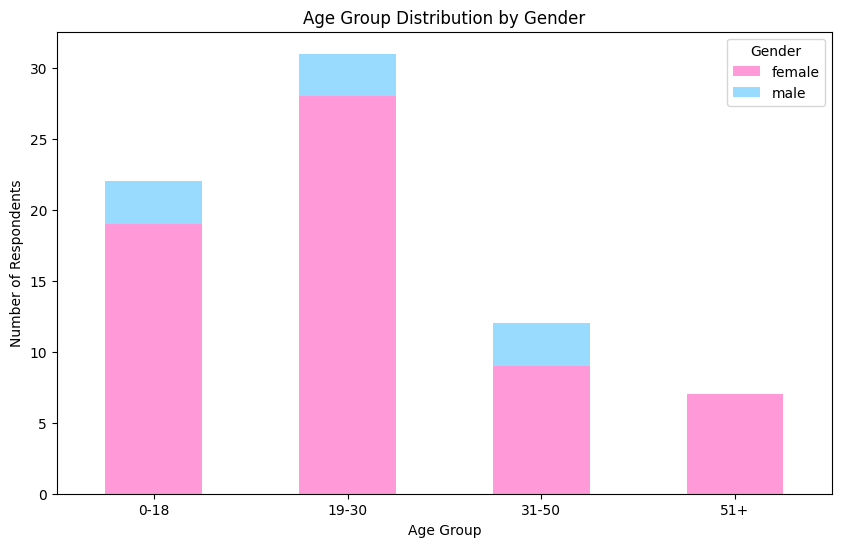

In [415]:
age_data = pd.DataFrame(survey_data_updated["Age"])
age_data['Age'] = pd.to_numeric(age_data['Age'], errors='coerce').dropna()

# Define age bins and labels
bins = [0, 18, 30, 50, 100]
labels = ['0-18', '19-30', '31-50', '51+']

# Group ages into bins
age_data['Age_Group'] = pd.cut(age_data['Age'], bins=bins, labels=labels, right=False)

# Use the actual gender data from survey_data_updated
age_data['Gender'] = survey_data_updated['Gender']
age_data = age_data[age_data['Gender'].isin(['male', 'female'])]

stacked_data = pd.crosstab(age_data['Age_Group'], age_data['Gender'])


# Plot
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff99d7', '#99daff'])
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()


*Most popular song*

/tmp/ipykernel_653/1112591249.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=song_counts.index, y=song_counts.values, palette="flare")


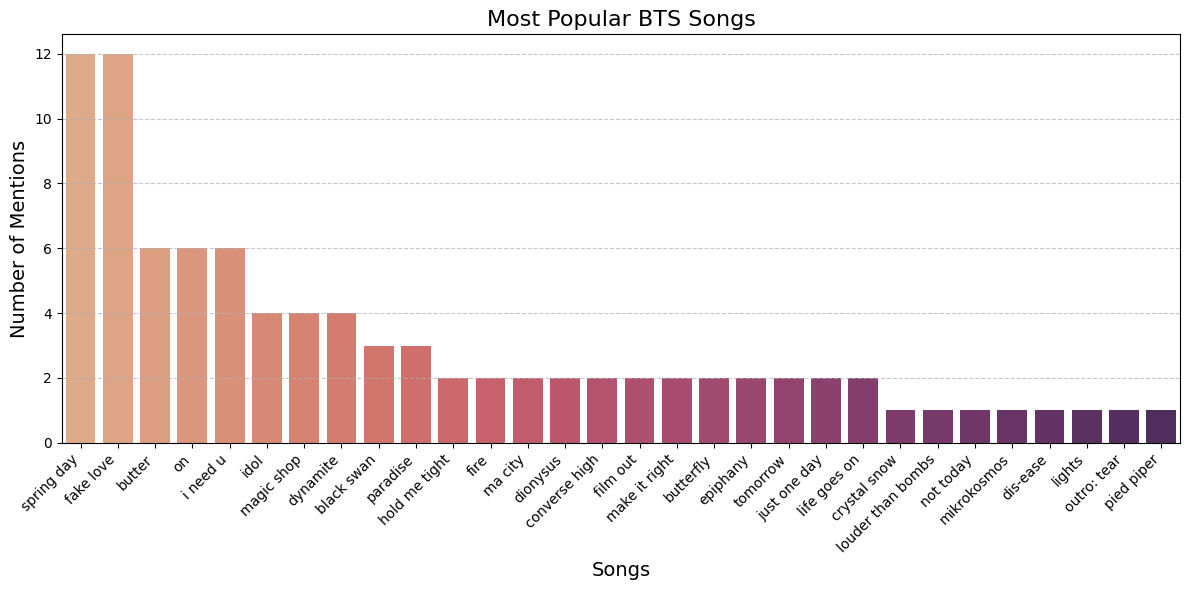

In [ ]:
song_counts = merged_data['Favorite_Song'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=song_counts.index, y=song_counts.values, palette="flare")

plt.title("Most Popular BTS Songs", fontsize=16)
plt.xlabel("Songs", fontsize=14)
plt.ylabel("Number of Mentions", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Analyzing the spotify traks features

The code performs clustering on Spotify track data to group tracks into different "mood clusters" based on their audio features. 

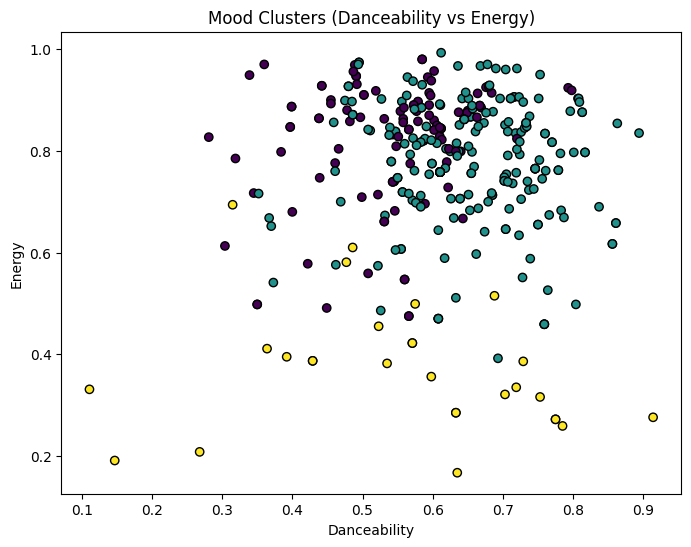

In [425]:
# Define the features for clustering
features = [
    'spotify_track_danceability',  
    'spotify_track_energy', 
    'spotify_track_loudness', 
    'spotify_track_valence', 
    'spotify_track_speechiness', 
    'spotify_track_acousticness', 
    'spotify_track_instrumentalness', 
    'spotify_track_liveness', 
    'spotify_track_tempo'
]

# Preprocess the data
df = spotify_data_updated[features].replace('no data', None)
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
df = df.fillna(df.mean())  # Fill missing values with column means

# Scaling the data to normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['mood_cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters (for example, using danceability and energy)
plt.figure(figsize=(8, 6))
plt.scatter(df['spotify_track_danceability'], df['spotify_track_energy'], c=df['mood_cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Mood Clusters (Danceability vs Energy)')
plt.show()


**Group 1 (danceability and energy)**

Many BTS tracks likely fall into the Yellow Cluster, showcasing their vibrant and energetic nature, making them suitable for upbeat and lively settings like parties. However, some tracks may belong to the Purple Cluster, reflecting a calmer, more ambient vibe.

In [419]:
# Group 2: Loudness and Valence
plt.scatter(df['spotify_track_loudness'], df['spotify_track_valence'], c=df['mood_cluster'])
plt.xlabel('Loudness')
plt.ylabel('Valence')
plt.title('Group 2 (Loudness and Valence)')
plt.show()

KeyError: 'mood_cluster'

**Group 2 (Loudness and Valence)**

Tracks likely cluster in the Yellow group, indicating loud, high-energy, and upbeat compositions, with some variability in emotional tone. A few quieter or more subdued tracks may fit into the Purple group, adding diversity to their discography.

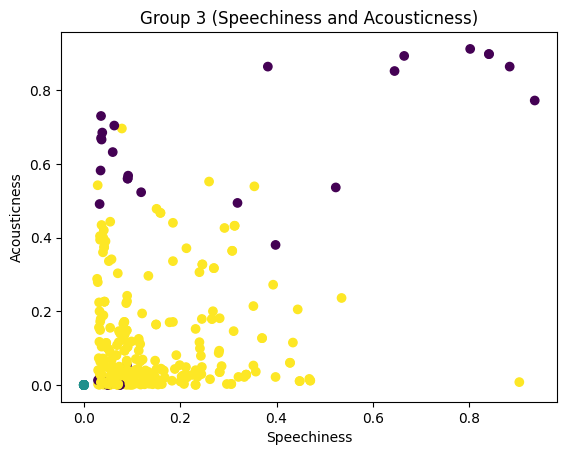

In [ ]:
    # Group 3: Speechiness vs Acousticness
    plt.scatter(df['spotify_track_speechiness'], df['spotify_track_acousticness'], c=df['mood_cluster'])
    plt.xlabel('Speechiness')
    plt.ylabel('Acousticness')
    plt.title('Group 3 (Speechiness and Acousticness)')
    plt.show()

**Group 3 (Speechiness and Acousticness)**

BTS songs predominantly seem non-speech-focused and synthetic (Yellow Cluster). However, there is also room for natural, acoustic-heavy tracks or rap-influenced songs (Purple Cluster), showcasing their versatility.

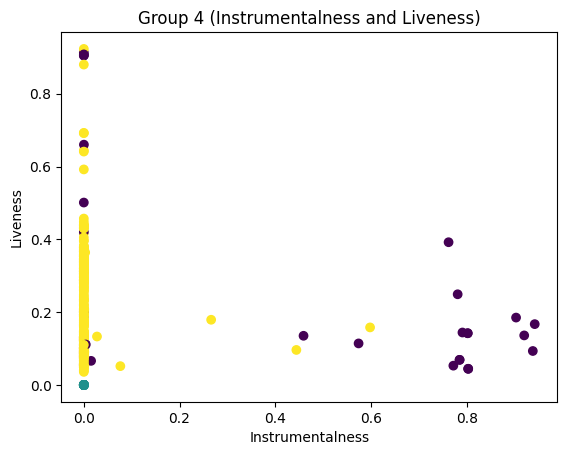

In [ ]:
# Group 4: Instrumentalness vs Liveness
plt.scatter(df['spotify_track_instrumentalness'], df['spotify_track_liveness'], c=df['mood_cluster'])
plt.xlabel('Instrumentalness')
plt.ylabel('Liveness')
plt.title('Group 4 (Instrumentalness and Liveness)')
plt.show()

**Group 4 (Instrumentalness and Liveness)**

Most BTS tracks likely belong to the Yellow Cluster, emphasizing vocal-heavy compositions that can be adapted for live performances. A smaller proportion may fall into the Purple Cluster, indicating a mix of instrumental and live elements, suitable for concerts or live sessions.

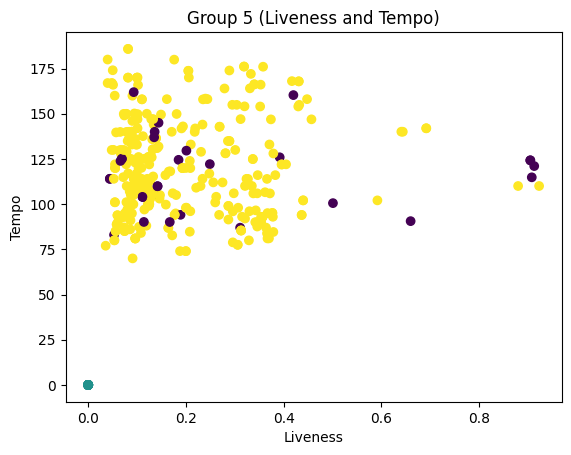

In [ ]:
# Group 5: Liveness vs Tempo
plt.scatter(df['spotify_track_liveness'], df['spotify_track_tempo'], c=df['mood_cluster'])
plt.xlabel('Liveness')
plt.ylabel('Tempo')
plt.title('Group 5 (Liveness and Tempo)')
plt.show()

**Group 5 (Liveness and Tempo)**

BTS tracks probably align with the Yellow Cluster, offering rhythmic diversity while not being heavily live-focused. A mix of dynamic tempos provides variety, while some tracks might stand out for their distinct energy.


## Overall Analyse:

BTS songs demonstrate remarkable diversity across all clusters, with a strong presence in Yellow Clusters for high-energy, upbeat, and rhythmically diverse tracks. Their music also spans calmer, more subdued tones (Purple Clusters) and studio-produced or experimental styles (Teal Clusters), reflecting a well-rounded and versatile discography.

The overall mood of the BTS songs is **uplifting, high-energy, and engaging**. However, their versatility allows for occasional calmer, quieter, or experimental tracks, creating a balance that caters to diverse listening experiences.

# Analyzing the lyrics of the most popular 3 songs

Enhanced Analysis of Top 3 Songs:

Song: Spring Day
Sentiment Polarity: -0.09 (Higher means more positive)
Sentiment Subjectivity: 0.49 (Higher means more personal)
Mood: Negative


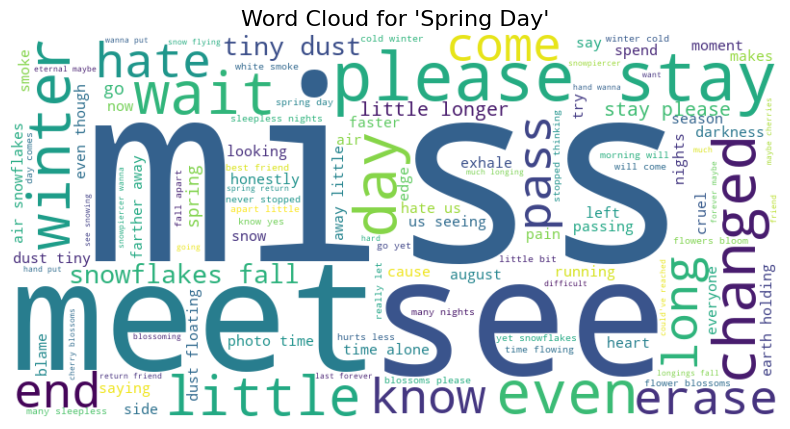


Song: Fake Love
Sentiment Polarity: 0.05 (Higher means more positive)
Sentiment Subjectivity: 0.77 (Higher means more personal)
Mood: Positive


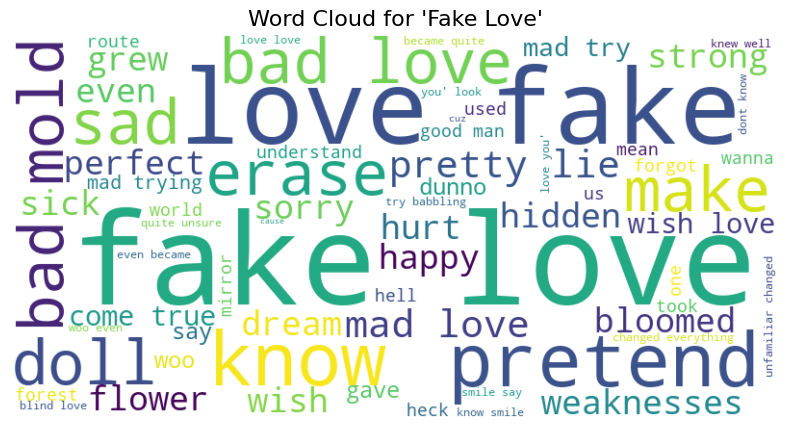


Song: Butter
Sentiment Polarity: 0.14 (Higher means more positive)
Sentiment Subjectivity: 0.47 (Higher means more personal)
Mood: Positive


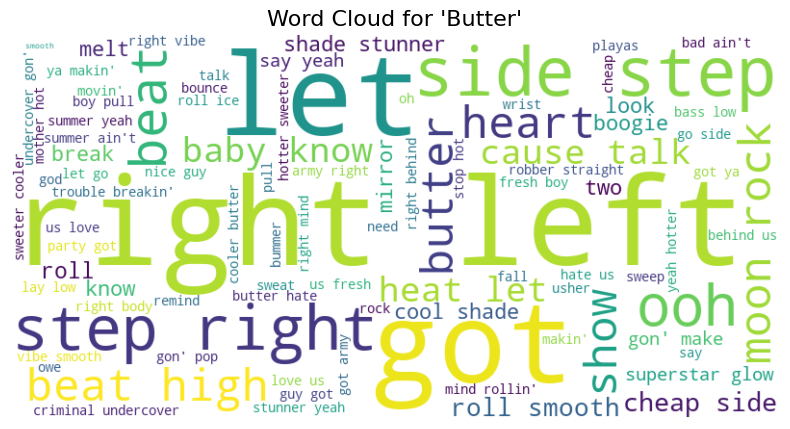


Correlating Sentiment with Mental Health Impact:

Mental Health Impact Correlation Data:
   Favorite_Song BTS_Mood_Impact BTS_Stress_Management
12    spring day               5                   yes
13    spring day               5                   yes
19    spring day               5                   yes
20    spring day               5                   yes
25    spring day               5                   yes
26    spring day               5                   yes
33    spring day               5                   yes
34    spring day               5                   yes
36    spring day               4                   yes
37    spring day               4                   yes
38     fake love               5                   yes
39     fake love               5                   yes
40     fake love               5                   yes
43     fake love               4          i don't know
44     fake love               4          i don't know
45     fake love              

In [ ]:
# Merge datasets on song titles
merged_songs_data = pd.merge(
    survey_data_updated, spotify_data_updated, 
    left_on='Favorite_Song', right_on='eng_track_title', 
    how='inner'
)

# Count mentions of each song
song_counts = merged_songs_data['Favorite_Song'].value_counts()

# Select the top 3 songs based on mentions
top_3_songs = song_counts.index[:3].tolist()

# Filter data for the top 3 songs
top_3_songs_data = merged_songs_data[merged_songs_data['Favorite_Song'].isin(top_3_songs)]

# Analyze the lyrics of the top 3 songs
print("Enhanced Analysis of Top 3 Songs:")
for song in top_3_songs:
    # Filter the rows corresponding to the current song
    song_data = top_3_songs_data[top_3_songs_data['Favorite_Song'] == song]
    
    # Combine all lyrics of the song into one string
    lyrics = " ".join(song_data['lyrics'].dropna())
    
    # Perform Sentiment Analysis
    analysis = TextBlob(lyrics)
    sentiment_polarity = analysis.sentiment.polarity
    sentiment_subjectivity = analysis.sentiment.subjectivity
    
    # Interpret sentiment results
    mood = "Positive" if sentiment_polarity > 0 else "Negative" if sentiment_polarity < 0 else "Neutral"
    
    print(f"\nSong: {song.title()}")
    print(f"Sentiment Polarity: {sentiment_polarity:.2f} (Higher means more positive)")
    print(f"Sentiment Subjectivity: {sentiment_subjectivity:.2f} (Higher means more personal)")
    print(f"Mood: {mood}")
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lyrics)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for '{song.title()}'", fontsize=16)
    plt.show()

# Correlate sentiment with survey responses
print("\nCorrelating Sentiment with Mental Health Impact:")
correlation_data = top_3_songs_data[['Favorite_Song', 'BTS_Mood_Impact', 'BTS_Stress_Management']]
print("\nMental Health Impact Correlation Data:")
print(correlation_data)


# Analyze fans comments from the survey

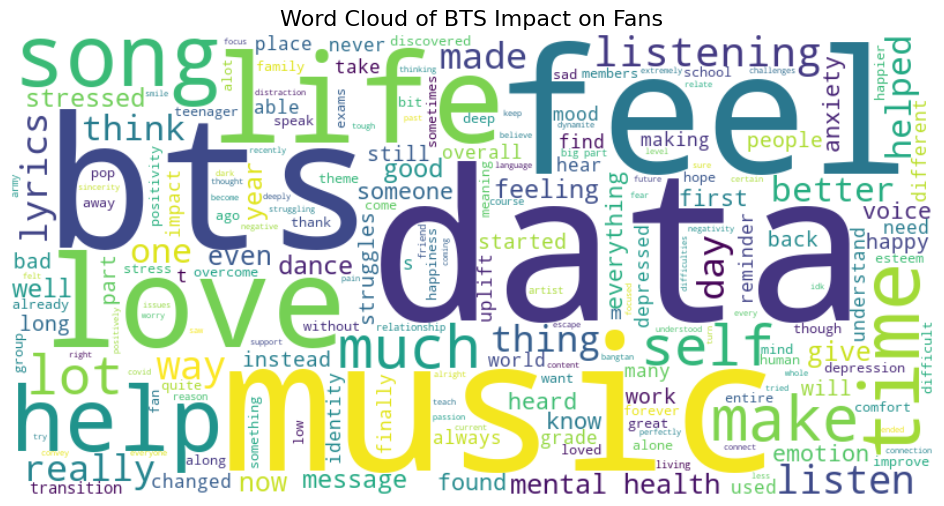

In [ ]:
# Combine the text from the selected columns into one string
impact_text = " ".join(survey_data_updated['BTS_Impact_Explanation'].dropna()) + " " + \
              " ".join(survey_data_updated['Additional_BTS_Impact'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(impact_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of BTS Impact on Fans", fontsize=16)
plt.show()


Impact on fans from different countries

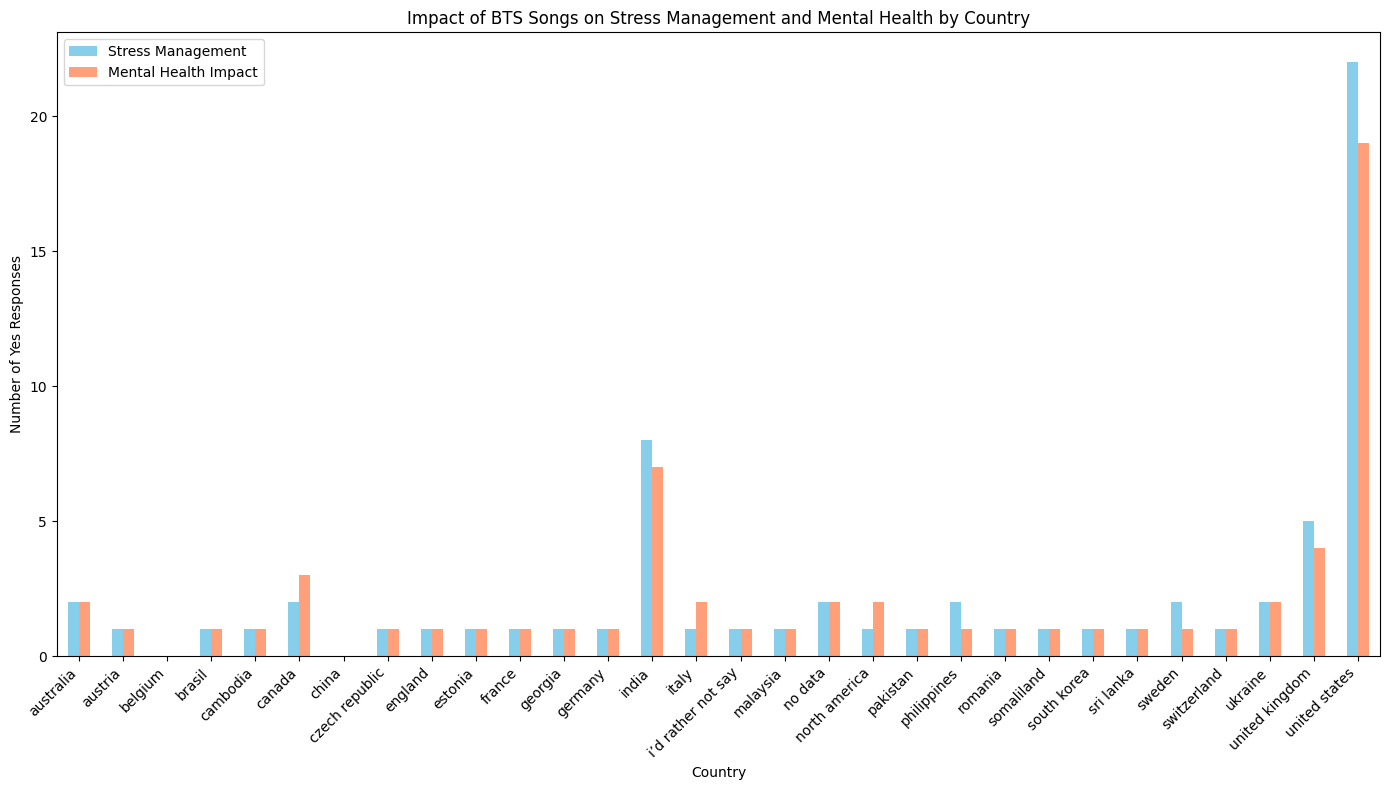

In [ ]:
# Aggregate data: Count "yes" responses for each country
country_impact_data = survey_data_updated.groupby('Country')[['BTS_Stress_Management', 'BTS_Mental_Health_Impact']].apply(
    lambda x: (x == 'yes').sum()
)

# Plot a bar chart
country_impact_data.plot(kind='bar', figsize=(14, 8), color=['#87CEEB', '#FFA07A'])
plt.title("Impact of BTS Songs on Stress Management and Mental Health by Country")
plt.xlabel("Country")
plt.ylabel("Number of Yes Responses")
plt.xticks(rotation=45, ha='right')
plt.legend(["Stress Management", "Mental Health Impact"])
plt.tight_layout()
plt.show()

## References

1. Color pallete: https://seaborn.pydata.org/tutorial/color_palettes.html